<a href="https://colab.research.google.com/github/aminghafari1/lcaging-fmri/blob/main/lcaging_scan_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
import numpy as np


Mounted at /content/gdrive


In [2]:
import scipy.io as sio
runs=["run1","run2","run3","run4","run5"]
print(runs[0])

run1


In [56]:
import glob
def substring_after(s,delim):
  return s.partition(delim)[2]
def substring_before(s,delim):
  return s.partition(delim)[0]

In [29]:

for run_index in range(len(runs)):
  file_directory=glob.glob('/content/gdrive/Shareddrives/LC-Aging/'\
  'Older Adult - MRI Study/Data Collection/BAP/BAP data/'\
  'sub-BAP103/ses-2/InsideScanner/'\
  'subjectBAP103_Voddball_session2_'\
  '%s' \
  '*.mat' %(runs[run_index]))
  if "eyetrack" in file_directory[0]:
    file_directory[0]=file_directory[1]
  file_directory=file_directory[0]
  current_run=sio.loadmat(file_directory)
  isoddball=current_run['isoddball']
  iscorr=current_run['iscorr']
  trial_offset=current_run['trial_offset']
  nan_indices=np.where(np.isnan(iscorr)==True)
  nan_indices=nan_indices[1]
  iscorr_corrected=iscorr[~np.isnan(iscorr)]
  trial_offset_corrected=trial_offset[~np.isnan(iscorr)]
  isoddball_corrected=isoddball[~np.isnan(iscorr)]
  print('The shape for the offset_trial_corrected in run %d' %(run_index), 'is:',np.shape(trial_offset_corrected))
  offsets_no_repeat_sorted=np.sort(np.unique(trial_offset))
  accuracy=np.zeros((np.size(offsets_no_repeat_sorted)))
  print(np.shape(accuracy))
  if run_index==0:
    accuracies=np.zeros((np.size(accuracy),np.size(runs)))
  for i in range(len(offsets_no_repeat_sorted)):
    corrects=0
    for j in range(len(iscorr_corrected)):
      if trial_offset_corrected[j]==offsets_no_repeat_sorted[i]:
        if iscorr_corrected[j]==1:
          corrects=corrects+1
    accuracy[i]=corrects/np.count_nonzero(trial_offset_corrected==offsets_no_repeat_sorted[i])
  accuracies[run_index,:]=accuracy





The shape for the offset_trial_corrected in run 0 is: (29,)
(5,)
The shape for the offset_trial_corrected in run 1 is: (30,)
(5,)
The shape for the offset_trial_corrected in run 2 is: (29,)
(5,)
The shape for the offset_trial_corrected in run 3 is: (30,)
(5,)
The shape for the offset_trial_corrected in run 4 is: (30,)
(5,)


In [57]:
temp=substring_after(file_directory,"sub-")
subject_index=substring_before(temp,"/ses")
print(subject_index)

  

BAP103


In [32]:
np.size(accuracies[0])

5

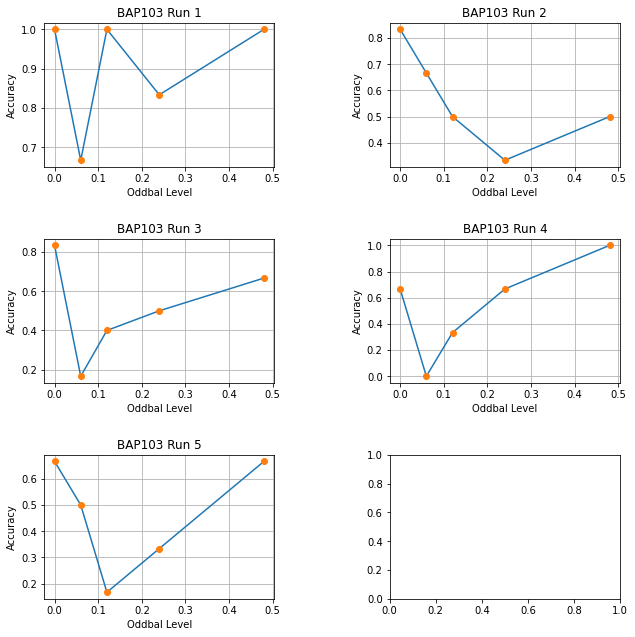

In [68]:
import matplotlib.pyplot as plt
num_rows=accuracies.shape[0]
fig ,axes=plt.subplots(nrows=(num_rows//2)+1, ncols=2, figsize=(10,10))

for i, ax in enumerate(axes.ravel()):
  if i<num_rows:
    ax.plot(offsets_no_repeat_sorted,accuracies[i])
    ax.plot(offsets_no_repeat_sorted,accuracies[i], 'o', label='data points')
    ax.set_title(f"%s Run {i+1}" %(subject_index))
    ax.set_xlabel("Oddbal Level")
    ax.set_ylabel("Accuracy")
    ax.grid(True)
plt.subplots_adjust(wspace=0.5, hspace=0.5, left=0.1, right=0.9, top=0.9, bottom=0.1)
save_directory=('/content/gdrive/Shareddrives/LC-Aging/LC_aging_fMRI')
plt.savefig(f"{save_directory}/juv.png")

In [62]:
saving_dict={}
saving_dict[subject_index+"_accuracies"]=accuracies
print(saving_dict[subject_index+"_accuracies"])

[[1.         0.66666667 1.         0.83333333 1.        ]
 [0.83333333 0.66666667 0.5        0.33333333 0.5       ]
 [0.83333333 0.16666667 0.4        0.5        0.66666667]
 [0.66666667 0.         0.33333333 0.66666667 1.        ]
 [0.66666667 0.5        0.16666667 0.33333333 0.66666667]]
